In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore') 

In [94]:
#Importing the data
df = pd.read_csv('heart.csv')

In [95]:
#Renameing the columns
column_name = {'age':'Age', 'sex':'Sex', 'cp':'ChestPainType', 'trestbps':'RestingBP', 'chol':'Cholesterol', 'fbs':'FastingBS', 'restecg':'RestingECG', 'thalach':'MaxHR', 'exang':'ExerciseAngina', 'oldpeak':'Oldpeak', 'slope':'ST_Slope', 'target':'HeartDisease'}
df.rename(columns=column_name, inplace=True)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,ca,thal,HeartDisease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1025 non-null   int64  
 1   Sex             1025 non-null   int64  
 2   ChestPainType   1025 non-null   int64  
 3   RestingBP       1025 non-null   int64  
 4   Cholesterol     1025 non-null   int64  
 5   FastingBS       1025 non-null   int64  
 6   RestingECG      1025 non-null   int64  
 7   MaxHR           1025 non-null   int64  
 8   ExerciseAngina  1025 non-null   int64  
 9   Oldpeak         1025 non-null   float64
 10  ST_Slope        1025 non-null   int64  
 11  ca              1025 non-null   int64  
 12  thal            1025 non-null   int64  
 13  HeartDisease    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


EDA

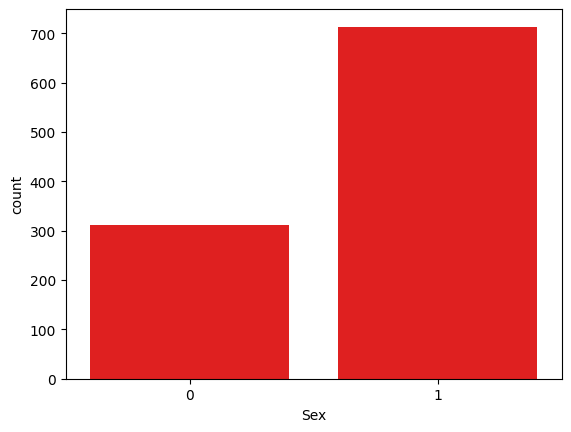

In [97]:
ax = sns.countplot(x="Sex", data=df,color='red')
plt.show()

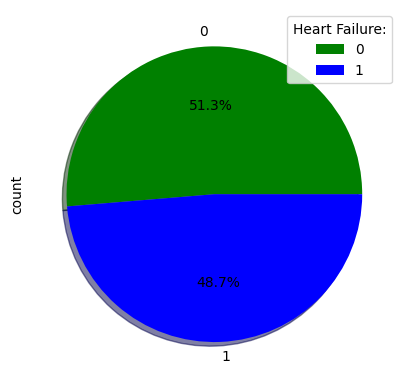

In [98]:
count=df['HeartDisease'].value_counts()
count.plot.pie(autopct="%1.1f%%",colors = ( "green", "blue"),labels = df['HeartDisease'].unique(), shadow = True)
plt.legend(title = "Heart Failure:")
plt.show()

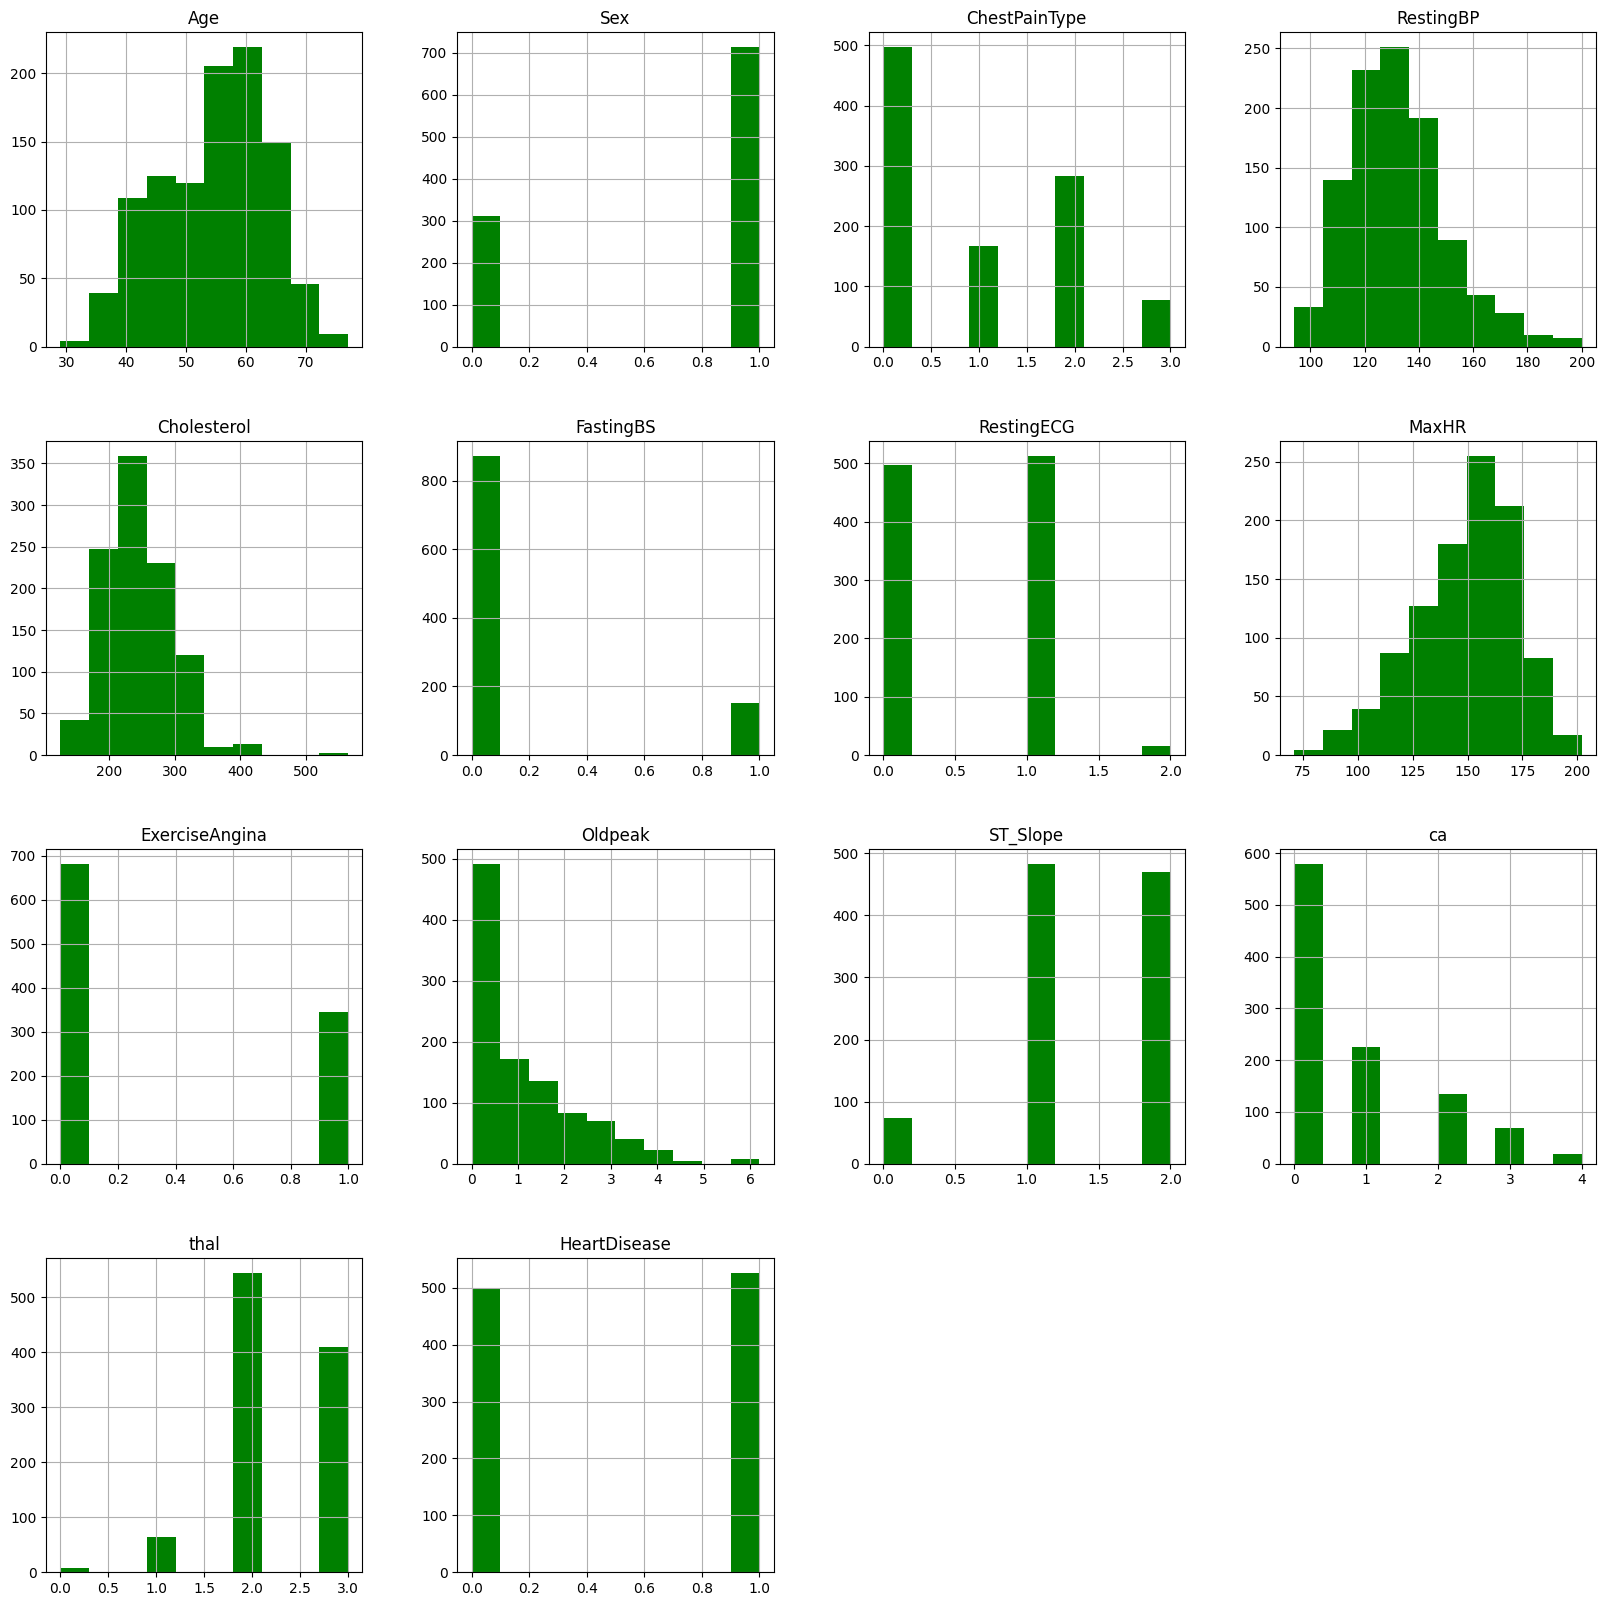

In [99]:
# plot histograms for each numerical variable
df.hist(figsize = (20, 20),color='green')
plt.show()

In [100]:
def diagnostic_plots(df, variable,target):
    # The function takes a dataframe (df) and

    # Define figure size.
    plt.figure(figsize=(20, 4))

    # histogram, to check counts
    plt.subplot(1, 4, 1)
    sns.histplot(df[variable], bins=30,color = 'r')
    plt.title('Histogram')


    # scatterplot, to check distribution
    plt.subplot(1, 4, 2)
    plt.scatter(df[variable],df[target],color = 'g')
    plt.title('Scatterplot')
    
    
    # boxplot, to check outliers
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df[variable],color = 'b')
    plt.title('Boxplot')
    
    plt.show()

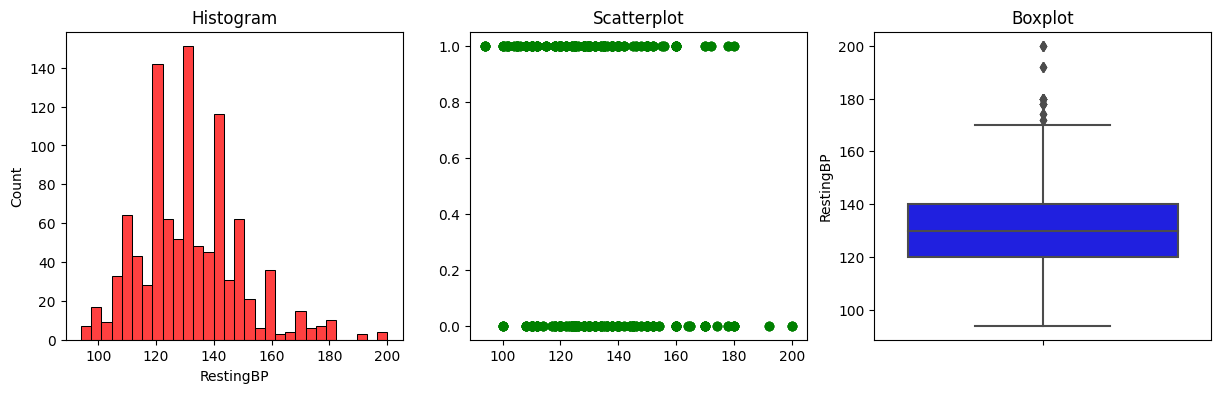

In [101]:
diagnostic_plots(df,'RestingBP','HeartDisease')

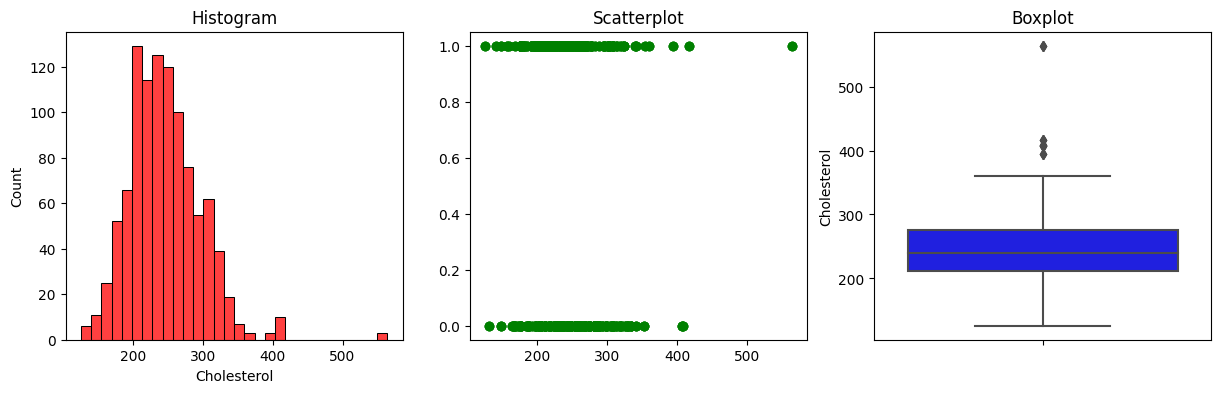

In [102]:
diagnostic_plots(df,'Cholesterol','HeartDisease')

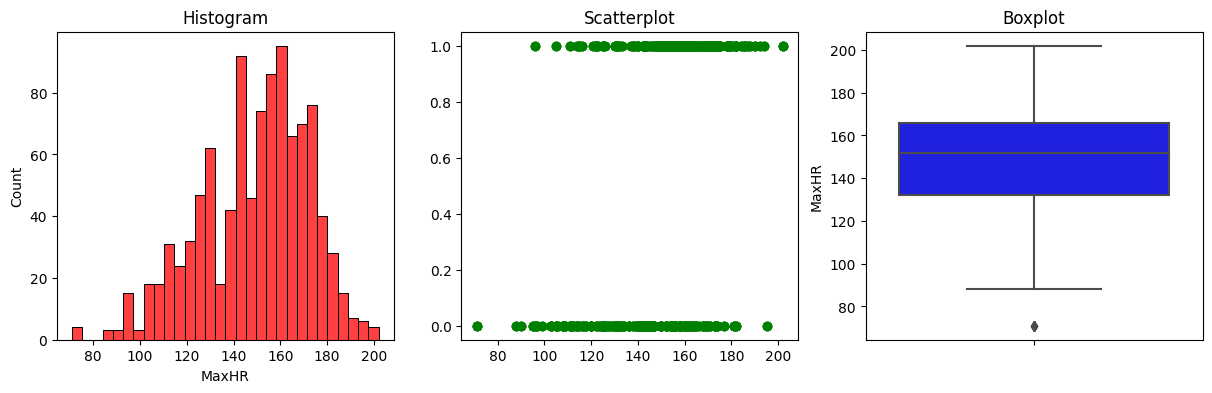

In [103]:
diagnostic_plots(df,'MaxHR','HeartDisease')

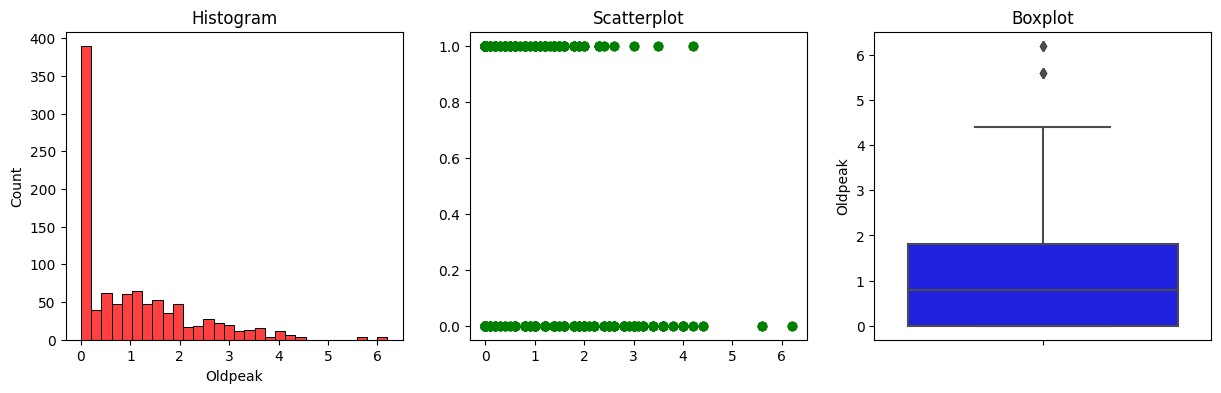

In [104]:
diagnostic_plots(df,'Oldpeak','HeartDisease')

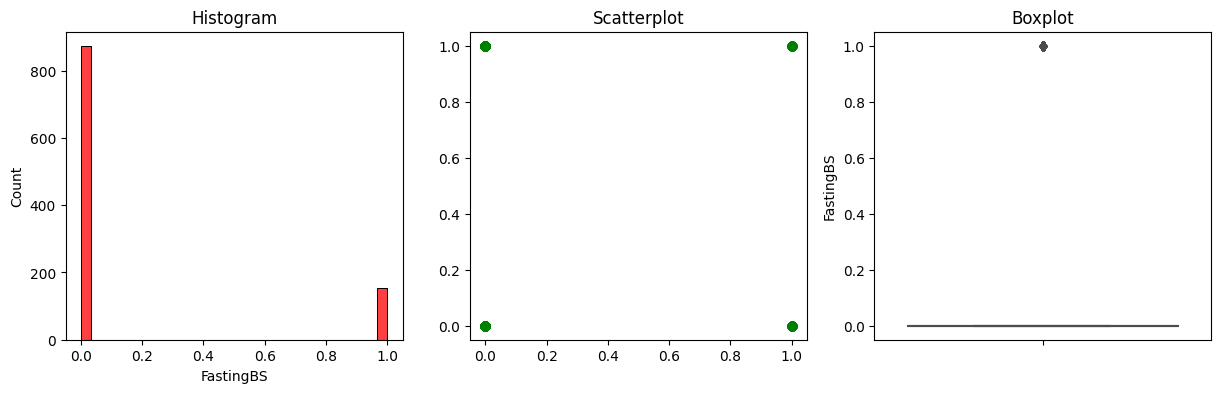

In [105]:
diagnostic_plots(df,'FastingBS','HeartDisease')

In [106]:
# We have only 0's and 1's in this feature.
df.FastingBS.value_counts()

FastingBS
0    872
1    153
Name: count, dtype: int64

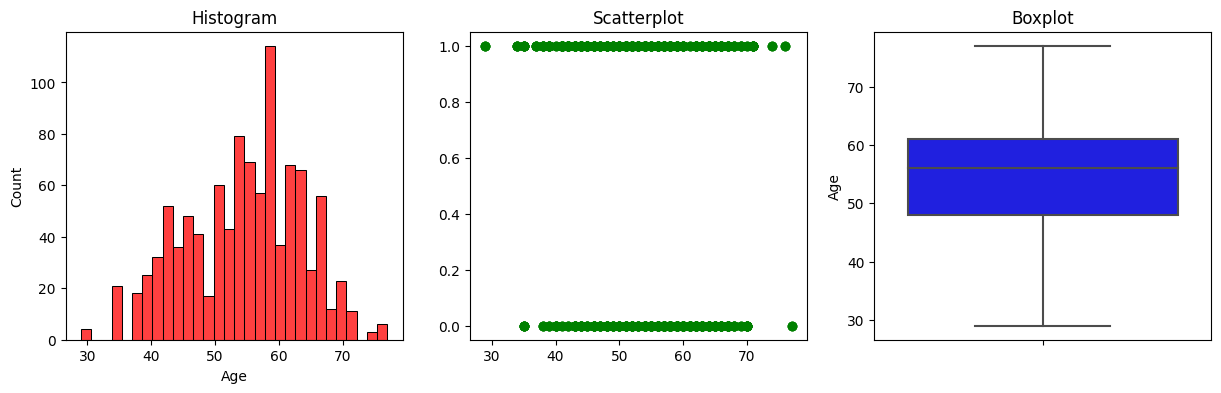

In [107]:
diagnostic_plots(df,'Age','HeartDisease')

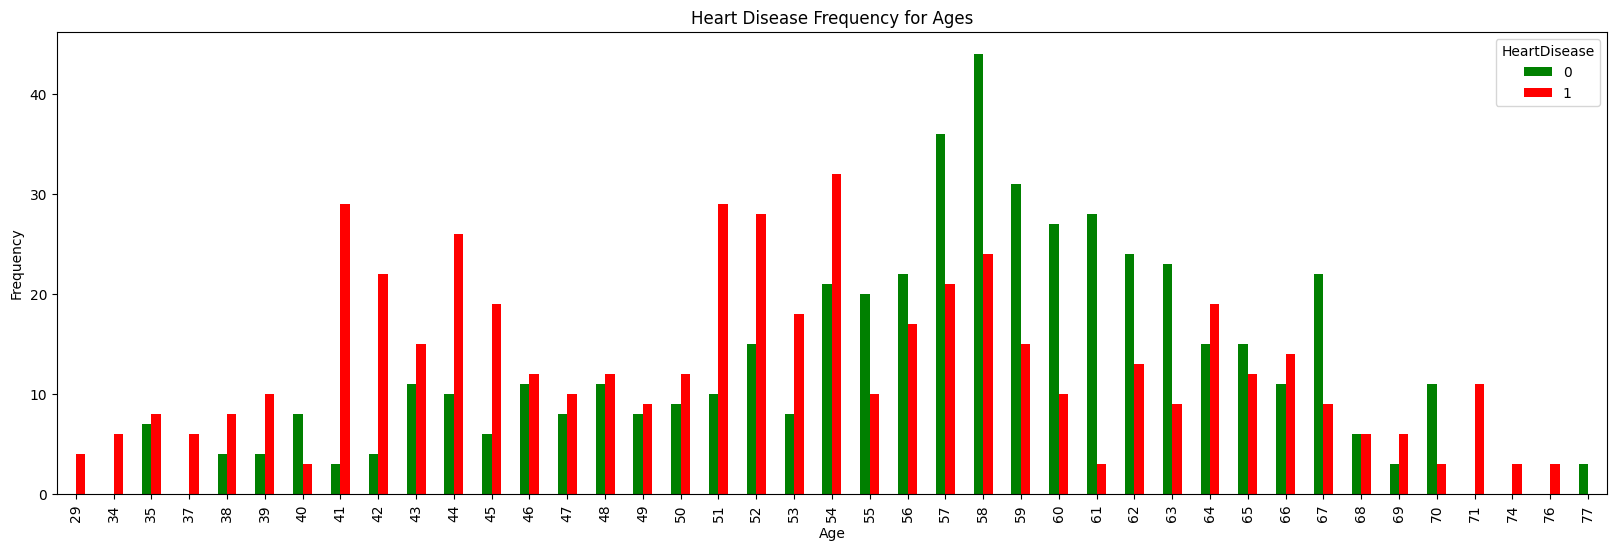

In [108]:
cross=pd.crosstab(df.Age,df.HeartDisease)
cross.plot(kind="bar",figsize=(20,6),color= ['green','red'])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

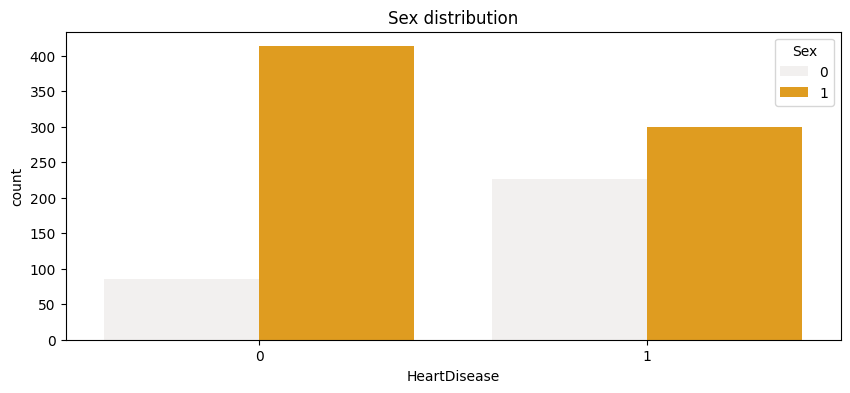

In [109]:
plt.figure(figsize=(10,4))
g = sns.countplot(data=df, x='HeartDisease', hue='Sex',color='orange')
plt.title('Sex distribution')
plt.show()

In [110]:
#for checking outliers and removing them
def detect_outliers(df,features):
    df_copy = df.drop(df[(df[features] == 0)].index)
    # 1st quartile
    q1 = df_copy[features].quantile(0.25)
    # 3rd quartile
    q3 = df_copy[features].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    outlier_list_col = df_copy[(df_copy[features] >= Upper_tail) | (df_copy[features] <= Lower_tail)]  # | means "or"
    return pd.DataFrame(outlier_list_col)

In [111]:
RestingBP_outlier = detect_outliers(df,'RestingBP')
RestingBP_outlier.value_counts(RestingBP_outlier['HeartDisease'])

HeartDisease
0    32
1    13
Name: count, dtype: int64

In [112]:
Cholesterol_outlier = detect_outliers(df,'Cholesterol')
Cholesterol_outlier.value_counts(Cholesterol_outlier['HeartDisease'])

HeartDisease
1    9
0    7
Name: count, dtype: int64

In [113]:
#imputer = SimpleImputer(strategy='median')

# We fit the imputer to the train set.
# The imputer will learn the median of all variables.
#cols_to_use = ['Cholesterol','RestingBP']
#imputer.fit(df[cols_to_use])

In [114]:
#df[cols_to_use] = imputer.transform(df[cols_to_use])

In [115]:
df.ChestPainType.value_counts()

ChestPainType
0    497
2    284
1    167
3     77
Name: count, dtype: int64

In [116]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
ca                0
thal              0
HeartDisease      0
dtype: int64

In [117]:
df['AgeGroup']= np.nan
df.loc[(df['Age']>=28) & (df['Age']<35),'AgeGroup']='Young Adult' 
df.loc[(df['Age']>=35) & (df['Age']<=64),'AgeGroup']='Adult'
df.loc[df['Age']>64,'AgeGroup']='Seniors'

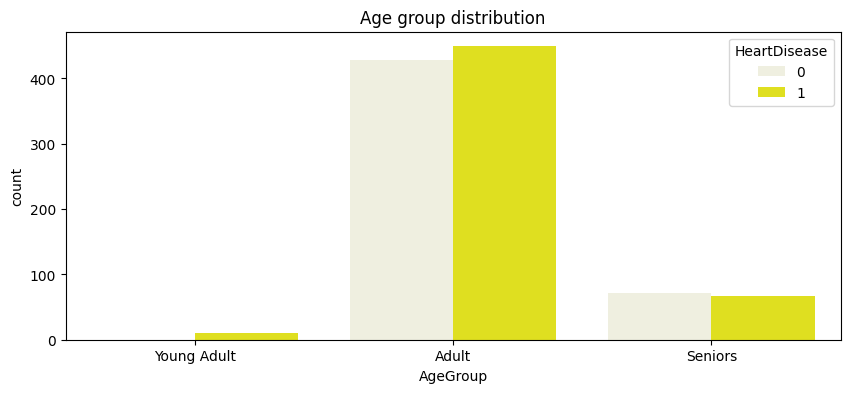

In [118]:
plt.figure(figsize=(10,4))
g=sns.countplot(data=df, x='AgeGroup', hue='HeartDisease', order=['Young Adult','Adult','Seniors'],color='yellow')
plt.title('Age group distribution')
plt.show()

In [119]:
df.drop(['Age'], axis=1, inplace=True)

In [120]:
catcols = ['Sex', 'ChestPainType','FastingBS','RestingECG',
            'ExerciseAngina',  'ST_Slope','AgeGroup']

In [121]:
def Label_Encoding(df,feature):
    label_encoder = LabelEncoder()
    df[feature]= label_encoder.fit_transform(df[feature])

In [122]:
for i in catcols:
    Label_Encoding(df,i)

In [123]:
df.head()

,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,ca,thal,HeartDisease,AgeGroup
0,1,0,125,212,0,1,168,0,1.0,2,2,3,0,0
1,1,0,140,203,1,0,155,1,3.1,0,0,3,0,0
2,1,0,145,174,0,1,125,1,2.6,0,0,3,0,1
3,1,0,148,203,0,1,161,0,0.0,2,1,3,0,0
4,0,0,138,294,1,1,106,0,1.9,1,3,2,0,0


In [124]:
numcols  = ['RestingBP','Cholesterol','MaxHR']

In [125]:
scaler = StandardScaler()

# Scale data
df[numcols] = scaler.fit_transform(df[numcols])

Train test split

In [126]:
# Set up X and y variables
X =df.drop(columns='HeartDisease')
y=df['HeartDisease']
# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

PREDICTION

Logistic Regression

In [127]:
logreg = LogisticRegression()

In [128]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [129]:
y_pred = logreg.predict(X_test)

In [130]:
logregAcc = accuracy_score(y_test,y_pred)
logregAcc

0.7987012987012987

<Axes: >

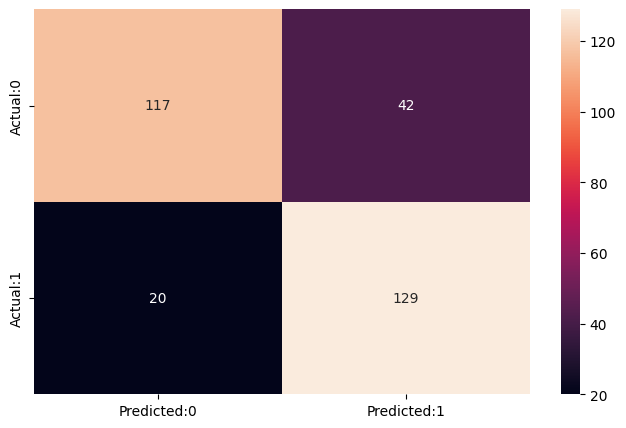

In [131]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')

KNN

In [132]:
# Building a model using KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [133]:
y_pred = knn.predict(X_test)

In [134]:
knnAcc = accuracy_score(y_test,y_pred)
knnAcc

0.7987012987012987

<Axes: >

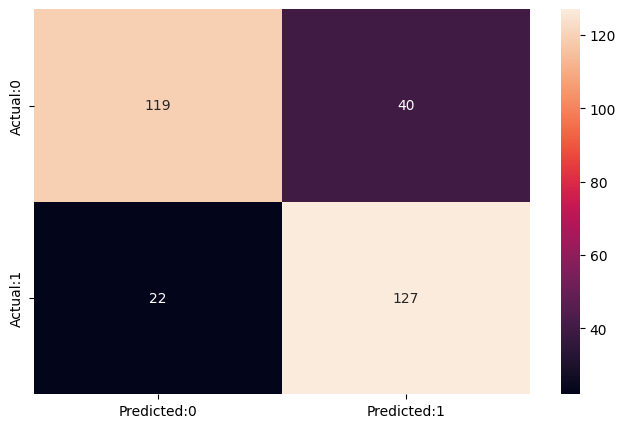

In [135]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')

Decision Tree

In [136]:
# Building Decision Tree model 
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [137]:
y_pred = clf.predict(X_test)

In [138]:
clfAcc = accuracy_score(y_test,y_pred)
clfAcc

0.9707792207792207

<Axes: >

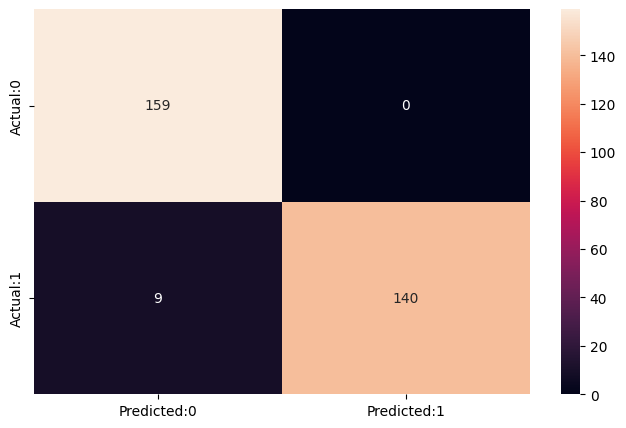

In [139]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')

SVM

In [140]:
svm = SVC(random_state=1)
svm.fit(X_train,y_train)

SVC(random_state=1)

In [141]:
y_pred = svm.predict(X_test)

In [142]:
svmAcc = accuracy_score(y_test,y_pred)
svmAcc

0.8603896103896104

<Axes: >

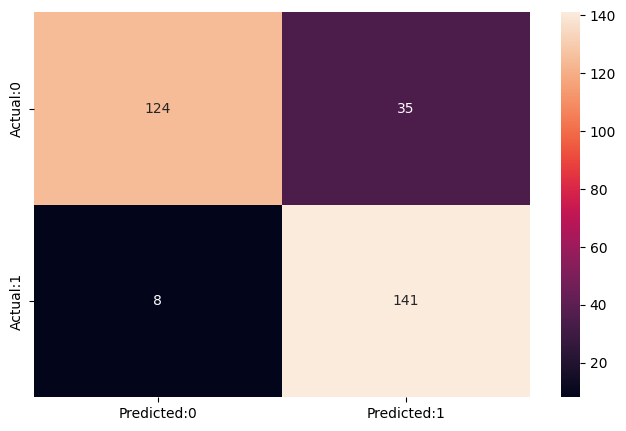

In [143]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')

In [144]:
data={'Estimators':['Logistic Regression', 'K-Nearest Neighbor', 'Decision Tree','Support Vector Machine'],
      'Accuracy':[logregAcc,knnAcc,clfAcc,svmAcc]}

data =pd.DataFrame(data)

data.sort_values('Accuracy', ascending=False)

,Estimators,Accuracy
2,Decision Tree,0.970779
3,Support Vector Machine,0.860390
0,Logistic Regression,0.798701
1,K-Nearest Neighbor,0.798701
